In [1]:
%matplotlib inline

In [119]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import sedFilter
import numpy as np
import itertools
import collections
import math
from scipy import interpolate

In [57]:
#BROWN
emission_lines_file = '../eml_data/emission_lines.dat'
listOfSedsFile = "brown.seds"
pathToFile = "../sed_data/"
brownSEDs = sedFilter.createSedDict(listOfSedsFile, pathToFile)
msed = sedFilter.MaskSEDs(brownSEDs, emission_lines_file)
msed.mask_SEDs()


# return SEDs with lines masked
masked_seds = msed.return_masked_SEDs()

Adding SED Arp_118_spec to dictionary
Adding SED Arp_256_N_spec to dictionary
Adding SED Arp_256_S_spec to dictionary
Adding SED CGCG_049-057_spec to dictionary
Adding SED CGCG_436-030_spec to dictionary
Adding SED CGCG_453-062_spec to dictionary
Adding SED Haro_06_spec to dictionary
Adding SED IC_0691_spec to dictionary
Adding SED IC_0860_spec to dictionary
Adding SED IC_0883_spec to dictionary
Adding SED IC_4051_spec to dictionary
Adding SED IC_4553_spec to dictionary
Adding SED IC_5298_spec to dictionary
Adding SED III_Zw_035_spec to dictionary
Adding SED II_Zw_096_spec to dictionary
Adding SED IRAS_08572+3915_spec to dictionary
Adding SED IRAS_17208-0014_spec to dictionary
Adding SED Mrk_0331_spec to dictionary
Adding SED Mrk_0475_spec to dictionary
Adding SED Mrk_0930_spec to dictionary
Adding SED Mrk_1450_spec to dictionary
Adding SED Mrk_1490_spec to dictionary
Adding SED Mrk_33_spec to dictionary
Adding SED NGC_0337_spec to dictionary
Adding SED NGC_0474_spec to dictionary
Addi

In [256]:
#SIMS
simulation_seds = np.loadtxt('../../data/simulation_data.txt')
waveLS = simulation_seds[0,:]
sim_gals_mags = simulation_seds[1:,:]


In [272]:
sedname=brownSEDs.keys()[88]
wlmin = 3000
wlmax = 12000
nlam = 10000
wnorm = 5489.25

In [273]:
sed_masked = masked_seds[sedname]
wlgrid, fl_masked = sed_masked.getSedData(lamMin=wlmin, lamMax=wlmax, nLam=nlam)
wlgrid, fl_orig = brownSEDs[sedname].getSedData(lamMin=wlmin, lamMax=wlmax, nLam=nlam)

In [274]:
inorm0 = (np.abs(wlgrid-wnorm)).argmin()
wlgrid[inorm0]

5489.6489648964898

(0.5, 1.5)

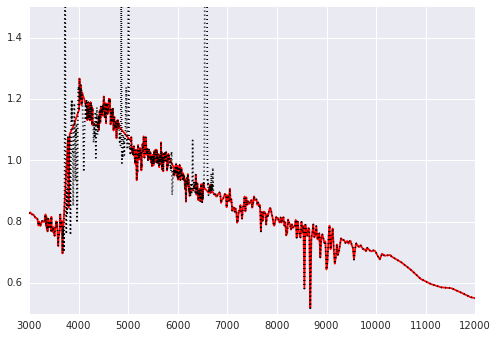

In [275]:
plt.plot(wlgrid, fl_masked/fl_masked[inorm0], color='r', label="masked")
plt.plot(wlgrid, fl_orig/fl_orig[inorm0], color='black', linestyle='dotted', label="original")
plt.ylim(0.5,1.5)

In [276]:
win=np.where((waveLS >= wlmin) & (waveLS <=wlmax))[0]
wave_short=waveLS[win]
wave_bins=waveLS[win[0]-1:win[-1]+2]
fluxes = pow(10.,(-0.4*sim_gals_mags[5553,win]))/(wave_short*wave_short)
wnorm = 5489.25
inorm1 = (np.abs(wave_short-wnorm)).argmin()
print wave_bins[1]
print wave_short[0]

3013.5
3013.5


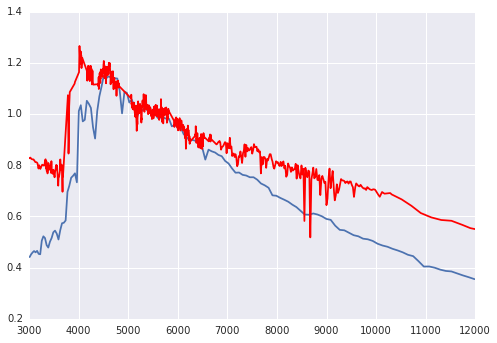

In [277]:
plt.plot(wave_short, fluxes/fluxes[inorm1])
plt.plot(wlgrid, fl_masked/fl_masked[inorm0], color='r', label="masked")

In [278]:
finter = interpolate.interp1d(wlgrid, fl_masked/fl_masked[inorm0])

In [279]:
N=len(wave_short)
deg_flux=np.zeros(N)
deg_lambda=np.zeros(N)
for i in range(1,142):
    xdata=np.linspace(max(min(wlgrid),wave_bins[i-1]),min(wave_bins[i+1],max(wlgrid)),401)
    dx=xdata[1]-xdata[0]
    ydata=finter(xdata)
    deg_flux[i-1]=sum(ydata*dx)/(xdata[-1]-xdata[0])
    deg_lambda[i-1]=xdata[200]
finter2 = interpolate.interp1d(wave_short,fluxes)
deg_sim_flux=finter2(deg_lambda)
wnorm = 5489.25
inorm2 = (np.abs(deg_lambda-wnorm)).argmin()

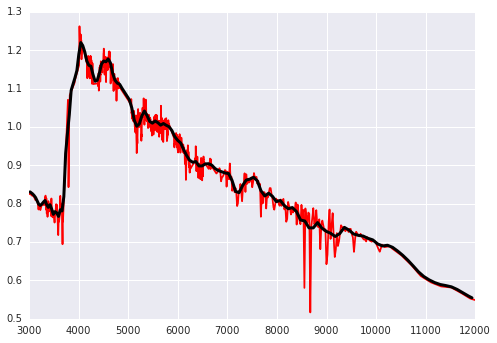

In [280]:
plt.plot(wlgrid, fl_masked, color='r', label="masked")
plt.plot(deg_lambda,deg_flux,lw=3,color='k')

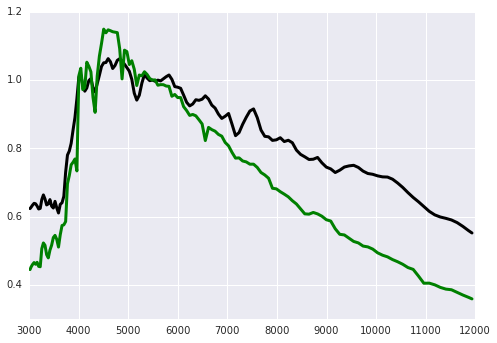

In [255]:
plt.plot(deg_lambda,deg_flux/deg_flux[inorm2],lw=3,color='k')
plt.plot(deg_lambda,deg_sim_flux/deg_sim_flux[inorm2],lw=3,color='g')

In [293]:
OR=[]
MASKED=[]
DEG=[]
for j in xrange(129):
    sedname=brownSEDs.keys()[j]
    wlmin = 3000
    wlmax = 12000
    nlam = 10000
    wnorm = 5489.25
    sed_masked = masked_seds[sedname]
    wlgrid, fl_masked = sed_masked.getSedData(lamMin=wlmin, lamMax=wlmax, nLam=nlam)
    wlgrid, fl_orig = brownSEDs[sedname].getSedData(lamMin=wlmin, lamMax=wlmax, nLam=nlam)
    finter = interpolate.interp1d(wlgrid, fl_masked/fl_masked[inorm0])
    N=len(wave_short)
    deg_flux=np.zeros(N)
    deg_lambda=np.zeros(N)
    for i in range(1,142):
        xdata=np.linspace(max(wlmin,wave_bins[i-1]),min(wave_bins[i+1],wlmax),401)
        dx=xdata[1]-xdata[0]
        ydata=finter(xdata)
        deg_flux[i-1]=sum(ydata*dx)/(xdata[-1]-xdata[0])
        deg_lambda[i-1]=xdata[200]
    MASKED.append(fl_masked/fl_masked[inorm0])
    OR.append(fl_orig/fl_orig[inorm0])
    DEG.append(deg_flux)

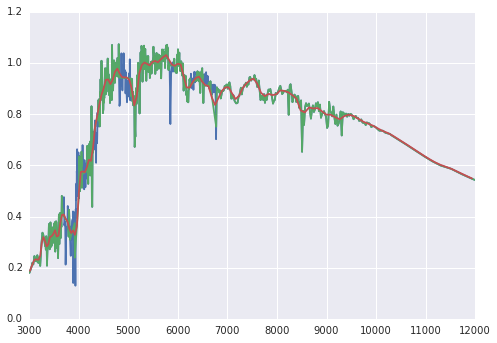

In [317]:
k=44
plt.plot(wlgrid,OR[k])
plt.plot(wlgrid,MASKED[k])
plt.plot(deg_lambda,DEG[k])


In [323]:
#SIMS
SIMS=[]
Nsim=len(sim_gals_mags)
for j in xrange(Nsim):
    fluxes = pow(10.,(-0.4*sim_gals_mags[j,win]))/(wave_short*wave_short)
    finter2 = interpolate.interp1d(wave_short,fluxes)
    deg_sim_flux=finter2(deg_lambda)
    SIMS.append(deg_sim_flux)
wnorm = 5489.25
inormf = (np.abs(deg_lambda-wnorm)).argmin()


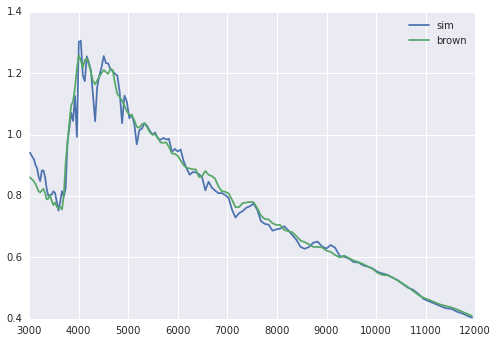

In [334]:
k=112
smax=np.inf
jmax=-1
for j in xrange(Nsim):
    diff=sum((SIMS[j]/SIMS[j][inormf]-DEG[k]/DEG[k][inormf])**2)
    if diff < smax:
        smax=diff
        jmax=j
    


plt.plot(deg_lambda,SIMS[jmax]/SIMS[jmax][inormf],label='sim')
plt.plot(deg_lambda,DEG[k]/DEG[k][inormf],label='brown')
plt.legend(loc=0)

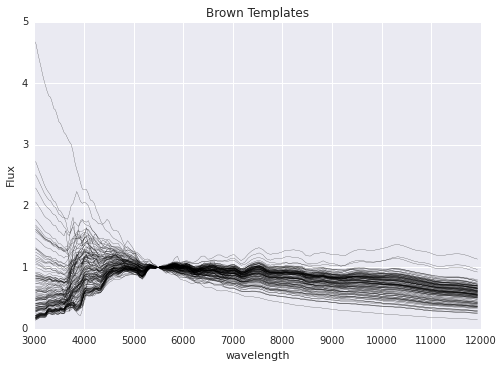

In [826]:

for j in xrange(len(DEG)):
    plt.plot(deg_lambda,DEG[j]/DEG[j][inormf],lw=0.2,color='k')
    
l1,b1=np.loadtxt('../../data/Arp220_template_norm.sed',unpack=True)
l2,b2=np.loadtxt('../../data/I20551_template_norm.sed',unpack=True)
l3,b3=np.loadtxt('../../data/I22491_template_norm.sed',unpack=True)
l4,b4=np.loadtxt('../../data/M82_template_norm.sed',unpack=True)
l5,b5=np.loadtxt('../../data/SB2_B2004a.sed',unpack=True)
l6,b6=np.loadtxt('../../data/SB3_B2004a.sed',unpack=True)

inormb1 = (np.abs(l1-wnorm)).argmin()
inormb2 = (np.abs(l2-wnorm)).argmin()
inormb3 = (np.abs(l3-wnorm)).argmin()
inormb4 = (np.abs(l4-wnorm)).argmin()
inormb5 = (np.abs(l5-wnorm)).argmin()
inormb6 = (np.abs(l6-wnorm)).argmin()


#plt.plot(l1,b1/b1[inormb1],lw=1.2,color='b')
#plt.plot(l2,b2/b2[inormb2],lw=1.2,color='b')
#plt.plot(l3,b3/b3[inormb3],lw=1.2,color='b')
#plt.plot(l4,b4/b4[inormb4],lw=1.2,color='b')
#plt.plot(l5,b5/b5[inormb5],lw=1.2,color='g')
#plt.plot(l6,b6/b6[inormb6],lw=1.2,color='g')


plt.xlim(3000,12000)
plt.ylim(0,5)
plt.xlabel('wavelength')
plt.ylabel('Flux')
plt.title('Brown Templates')
plt.savefig('brown_templates.png',bbox_inches='tight')

In [341]:
from sklearn.decomposition import PCA

In [971]:
pca = PCA(n_components=2)
S=np.array(SIMS)
for i in xrange(len(S)):
    S[i]=S[i]/S[i][inormf]
print np.shape(S)
D=np.array(DEG)
for i in xrange(len(D)):
    D[i]=D[i]/D[i][inormf]
print np.shape(DEG)
X=np.concatenate((S,D))
print np.shape(X)
X[-2][inormf]

(17113, 141)
(129, 141)
(17242, 141)


1.0

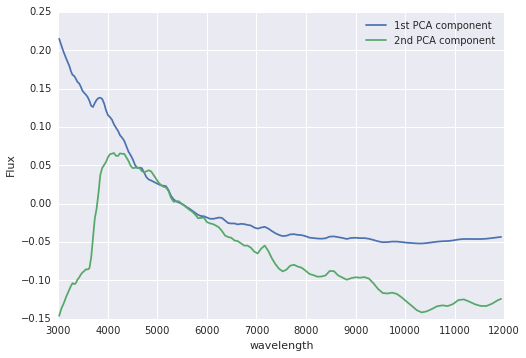

In [972]:
X_pca = pca.fit_transform(D)
plt.plot(deg_lambda,pca.components_[0],label='1st PCA component')
plt.plot(deg_lambda,pca.components_[1],label='2nd PCA component')
#plt.plot(deg_lambda,pca.components_[2],label='3rd PCA component')

plt.xlabel('wavelength')
plt.ylabel('Flux')
plt.legend(loc=0)
plt.savefig('pca_2_components.png',bbox_inches='tight')

In [985]:
S_pca=pca.transform(S)

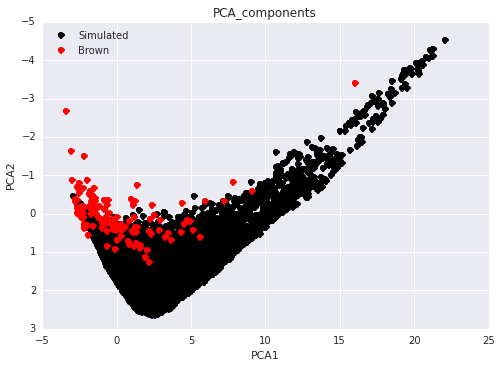

In [986]:
plt.plot(S_pca[:,0],S_pca[:,1],'ko',label='Simulated')
plt.plot(X_pca[:,0],X_pca[:,1],'ro',label='Brown')
plt.ylim(3,-5)
plt.title('PCA_components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc=0)
plt.savefig('pca_proj.png',bbox_inches='tight')

(3, -5)

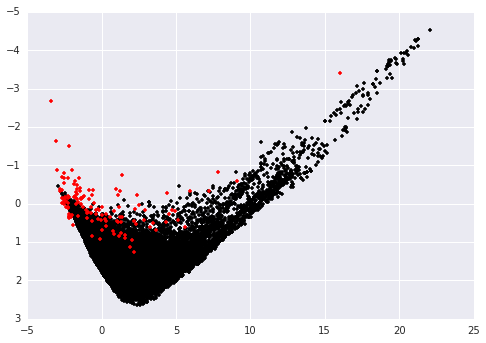

In [987]:
plt.plot(S_pca[:,0],S_pca[:,1],'k.')
plt.plot(X_pca[:,0],X_pca[:,1],'r.')
plt.ylim(3,-5)

In [989]:
from scipy import stats
xmin=-10
xmax=20
ymin=-2
ymax=6
x, y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([x.ravel(), y.ravel()])

In [990]:
kernel = stats.gaussian_kde(Bw_points.T)
f = np.reshape(kernel(positions).T, x.shape)

(3, -5)

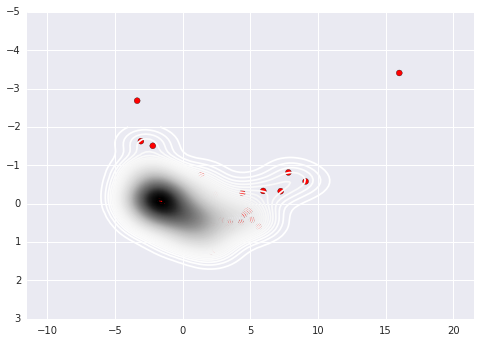

In [991]:
plt.contour(x,y,f,100)
plt.scatter(X_pca[:,0], X_pca[:,1], c='r', s=35)
plt.ylim(3,-5)

500


(3, -5)

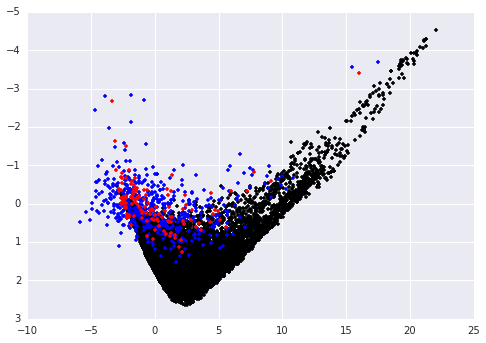

In [992]:
samples = kernel.resample(size=500)
keep = kernel(samples) < 1.02
print sum(keep)
plt.plot(S_pca[:,0],S_pca[:,1],'k.')
plt.plot(samples[0,keep],samples[1,keep],'b.')
plt.plot(X_pca[:,0],X_pca[:,1],'r.')
plt.ylim(3,-5)

In [993]:
from scipy.spatial import Delaunay
import math
def area(points):
    a = points[0]
    b = points[1]
    c = points[2]
    def distance(p1, p2):
        return math.hypot(p1[0]-p2[0], p1[1]-p2[1])

    side_a = distance(a, b)
    side_b = distance(b, c)
    side_c = distance(c, a)
    s = 0.5 * ( side_a + side_b + side_c)
    return math.sqrt(s * (s - side_a) * (s - side_b) * (s - side_c))

(20, 2)
0.0195017207288


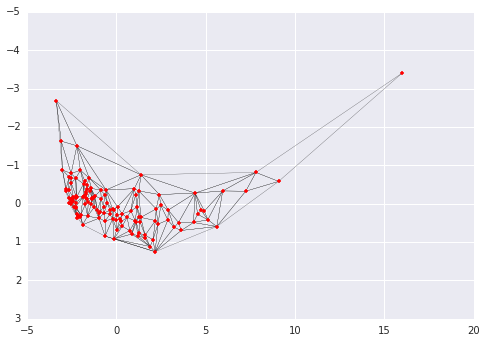

In [996]:
C=X_pca#np.concatenate((Bw_points,samples.T))
S2=np.array(ss[0])
print np.shape(S2)
plt.plot(C[:,0],C[:,1],'r.')
de = Delaunay(C)
len(de.simplices)
simplex=de.simplices.copy()
#plt.triplot(C[4:,0], C[4:,1])
one=de.simplices[6]
#plt.plot(C[one,0],C[one,1],'b-')
print area(C[de.simplices[6]])
plt.ylim(3,-5)
Areas = [area(C[de.simplices[i]]) for i in  xrange(de.nsimplex)]
sort_areas=np.argsort(Areas)
sort_areas=sort_areas[::-1]
for i in range(2,de.nsimplex):
    j=sort_areas[i]
    plt.triplot(C[de.simplices[j],0],C[de.simplices[j],1],'k-',lw=0.2)

inside 1282


(3, -5)

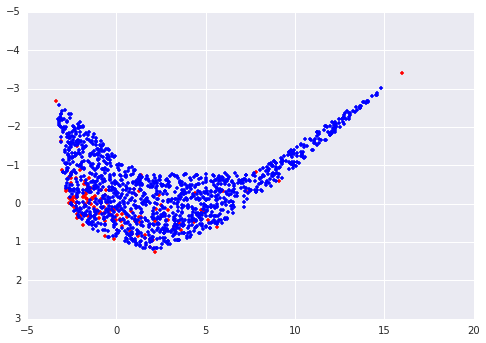

In [997]:
x=np.random.uniform(min(C[:,0]),max(C[:,0]),5000)
y=np.random.uniform(min(C[:,1]),max(C[:,1]),5000)

#p = np.array([(0.0, 0.0), (5, -2), (0,0)])
p=np.array([x,y]).T
locs=de.find_simplex(p)
inside=np.where(locs>=2)[0]
print 'inside', len(inside)
plt.plot(C[:,0],C[:,1],'r.')
plt.plot(x[inside],y[inside],'b.')
plt.ylim(3,-5)

In [1000]:
from scipy import stats
xmin=-5
xmax=20
ymin=-5
ymax=5
xg, yg = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
positions = np.vstack([xg.ravel(), yg.ravel()])
kernel = stats.gaussian_kde(np.array([x[inside],y[inside]]))
f = np.reshape(kernel(positions).T, xg.shape)

(3, -5)

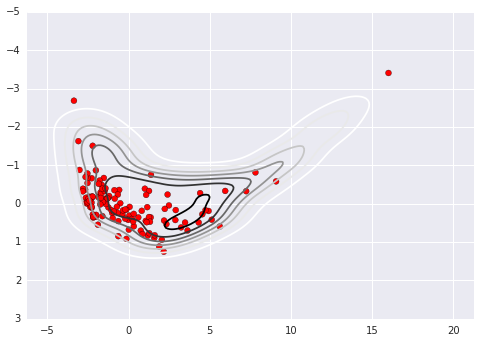

In [1001]:
plt.contour(xg,yg,f)
plt.scatter(X_pca[:,0], X_pca[:,1], c='r', s=35)
plt.ylim(3,-5)

(3, -5)

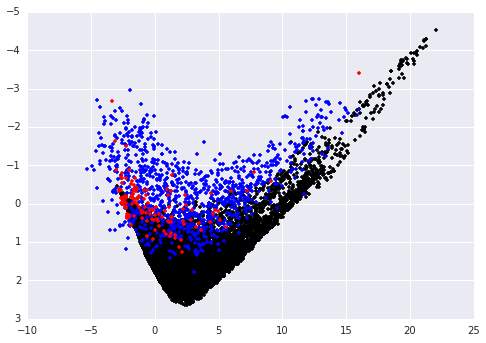

In [1002]:
samples = kernel.resample(size=1000)
keep = kernel(samples) > 0.0
plt.plot(S_pca[:,0],S_pca[:,1],'k.')
plt.plot(samples[0,keep],samples[1,keep],'b.')
plt.plot(X_pca[:,0],X_pca[:,1],'r.')
plt.ylim(3,-5)

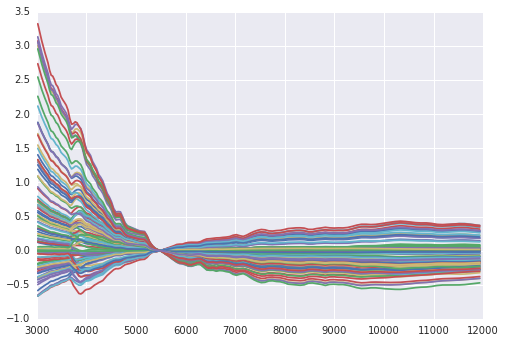

In [1004]:
for i in xrange(100):
    example=pca.components_[0]*samples[0,i]+pca.components_[1]*samples[1,i]
    plt.plot(deg_lambda,example,'k-')


In [1005]:
import SOMZ
import healpy as hp

In [1027]:
M=SOMZ.SelfMap(D, D[:,0],topology='grid', Ntop=12, iterations=420, periodic='no')

In [1028]:
M.create_map()

In [1029]:
M.evaluate_map()

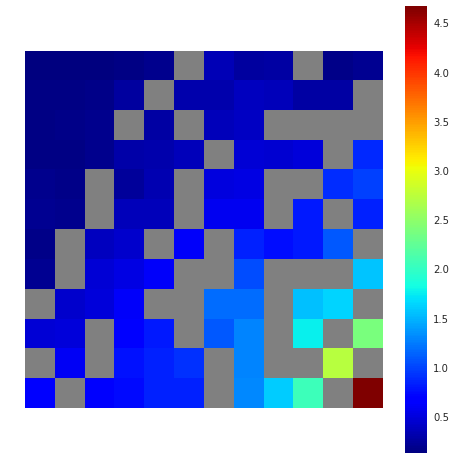

In [1030]:
M.plot_map()

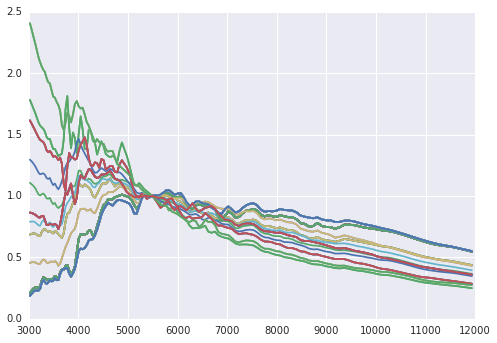

In [1031]:
for i in xrange(100):
    example=pca.components_[0]*samples[0,i]+pca.components_[1]*samples[1,i]
    idx=M.get_best(example)
    try:
        M.ivals[idx]
        Nidx=len(M.ivals[idx])
        recon=np.zeros(len(deg_lambda))
        for j in range(Nidx):
            recon+=D[M.ivals[idx][j]]*M.yvals[idx][j]
        #recon=sum(D[M.ivals[idx]]*M.yvals[idx])
        #recon=recon[0]
        #print np.shape(recon)
        plt.plot(deg_lambda, recon/recon[inormf])
    except:
        pass

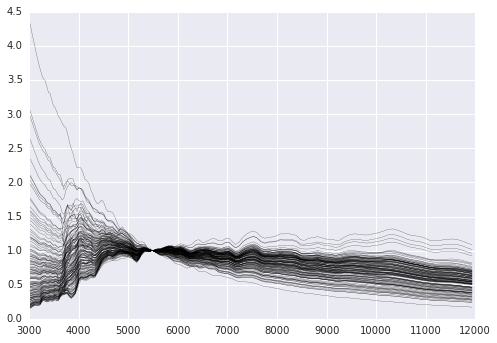

In [1032]:
for j in xrange(M.Ntop**2):
    plt.plot(deg_lambda,M.weights[:,j],lw=0.2,color='k')

In [675]:
#np.savetxt('../../data/degraded_brown.txt',D,fmt='%.10f')
#np.savetxt('../../data/degraded_sims.txt',S,fmt='%.10f')
#np.savetxt('../../data/wave.txt',deg_lambda,fmt='%.10f')